# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Komang Wibisana
- **Email:** 	M298D4KY2631@bangkit.academy
- **ID Dicoding:** [komang_wibisana_m298d4ky2631_o8lE]

##Pertanyaan Bisnis Yang Di Gunakan Pada Dataset

- Pertanyaan 1 :

  Berapakah perbandingan dari kepadatan peminjaman sepeda pada jam jam sibuk dan tidak sibuk pada season 1?

- Pertanyaan 2 :
  Berapa perbandingan jam peminjaman sepeda pada working day (hari kerja) dan holiday (hari libur)?

## Import Semua Packages/Library yang Digunakan

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

### Gathering Data

- Membaca/membuka file dengan format `.csv` sesuai dataset.

- Menampilkan bagian awal dataset dengan perintah `.head`

In [42]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving hour.csv to hour (2).csv


In [43]:
hour_df= pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada Assesing Data melakukan beberapa tahapan pada dataset yaitu :

- Mengecek data yang tidak lengkap menggunakan `.isna().sum()`
- Mengecek data yang invalid/tidak benar menggunakan `.info()`
- Mengecek data yang memiliki data duplikat dengan menggunakan `.duplicated().sum()`

In [44]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Pada tahapan Cleaning data melakukan tahapan pembersihan data yang terindikasi data bias dengan menggunakan `.drop`

In [46]:
hour_df.drop_duplicates(inplace=True)

In [47]:
hour_df.duplicated().sum()

0

In [48]:
hour_df[hour_df.isna()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------

In [49]:
hour_df = pd.read_csv("hour.csv")

hour_df.dropna(axis=0, inplace=True)

In [50]:
data = pd.read_csv('hour.csv')
print(data.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [51]:
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [52]:
data.fillna(data.mean(), inplace=True)

<ipython-input-52-a20208f658ce>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
print(data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


## Exploratory Data Analysis (EDA)

## Explore Data pada data hour_df
Pada tahapan Exploratory Data Analysis (EDA) melakuakan beberapa tahapan yaitu:

- Mengelompokan data data berdasarkan dari data `season` terhadap jumlah dari pengguna dan cuaca.
- Mengelompokan data data berdasarkan dari data `holiday` terhadap jumlah dari pengguna.
- Mengelompokan data data berdasarkan dari data `workingday` terhadap jumlah dari pengguna.
- Mengelompokan data data berdasarkan dari data `weathersit` terhadap jumlah dari pengguna.
- Mengelompokan data data berdasarkan dari data `mnth` terhadap jumlah dari pengguna yang terdaftar dan pengguna yang tidak terdaftar

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
hour_df.groupby(by="season").cnt.count().rename({1: '1. Spring', 2: '2. Summer', 3: '3. Fall', 4: '4. Winter'})

season
1. Spring    4242
2. Summer    4409
3. Fall      4496
4. Winter    4232
Name: cnt, dtype: int64

In [ ]:
seasonal_analysis = day_df.groupby(by="season").agg({
    "cnt": ["mean", "std"],
    "temp": ["mean", "std"],
    "hum": ["mean", "std"],
    "windspeed": ["mean", "std"]
}).reset_index()

print(seasonal_analysis)

  season          cnt                   temp                 hum            \
                 mean          std      mean       std      mean       std   
0      1  2604.132597  1399.942119  0.297748  0.102735  0.582903  0.151880   
1      2  4992.331522  1695.977235  0.544405  0.122650  0.626948  0.152841   
2      3  5644.303191  1459.800381  0.706309  0.070848  0.633482  0.119349   
3      4  4728.162921  1699.615261  0.422906  0.107834  0.668719  0.131248   

  windspeed            
       mean       std  
0  0.214537  0.086439  
1  0.203507  0.071629  
2  0.172095  0.059526  
3  0.171995  0.081565  


In [54]:
hour_df.groupby(by="holiday").cnt.count()

holiday
0    16879
1      500
Name: cnt, dtype: int64

In [55]:
holiday_analysis = hour_df.groupby(by="holiday").agg({
    "cnt": ["max", "min", "mean", "std"]
}).reset_index()

print(holiday_analysis)

  holiday  cnt                           
           max min       mean         std
0       0  977   1  190.42858  181.981435
1       1  712   1  156.87000  156.757478


In [ ]:
hour_df.groupby(by="workingday").cnt.count()

workingday
0     5514
1    11865
Name: cnt, dtype: int64

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [ ]:
print(data.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

## Visualization & Explanatory Analysis

In [56]:
print(data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


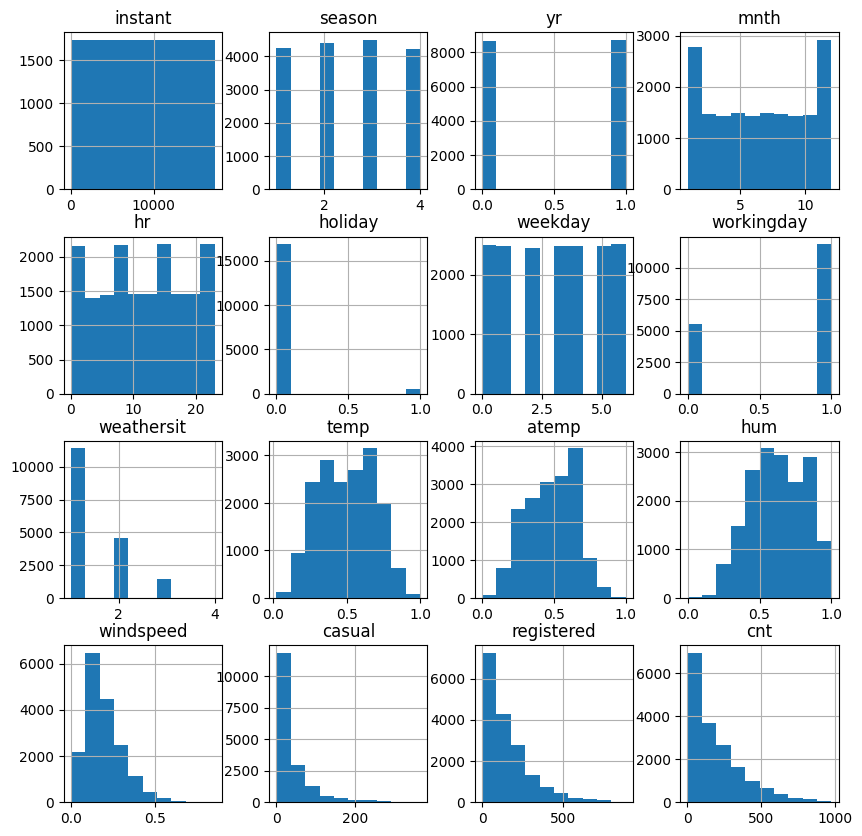

In [57]:
hour_df.hist(figsize=(10, 10))
plt.show()

<ipython-input-59-a88b4204d1b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


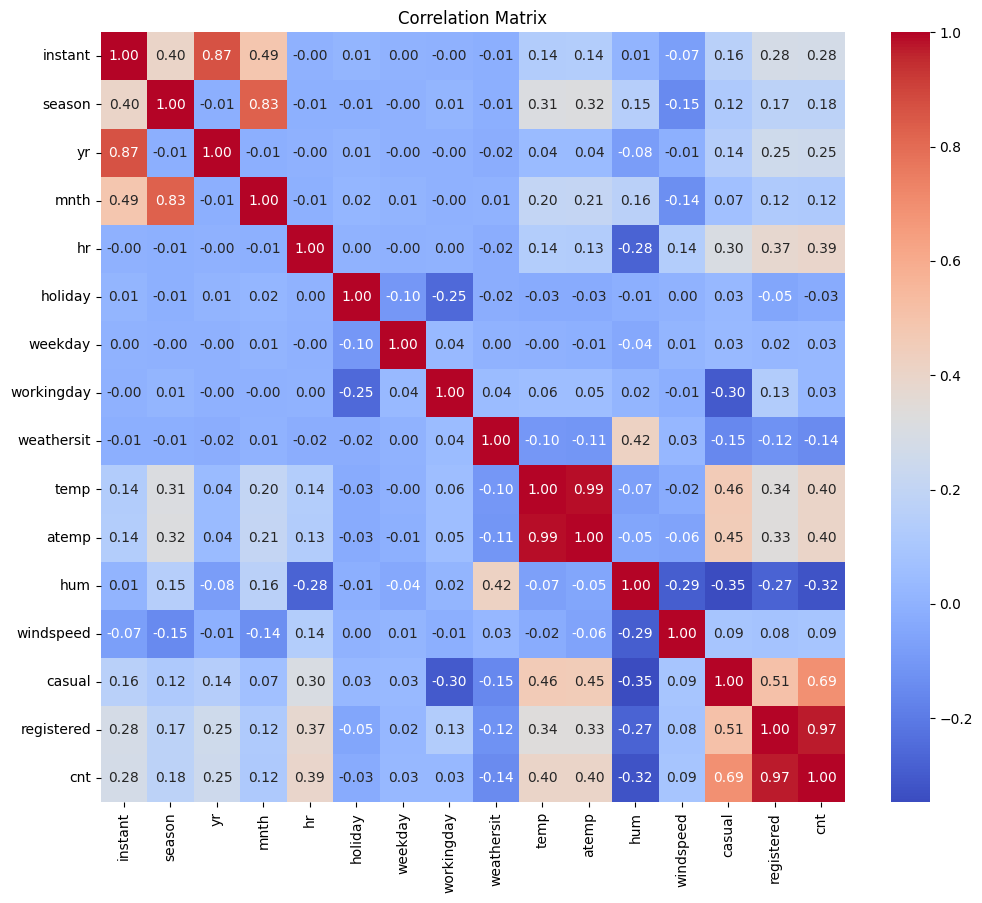

In [59]:
heatmap_data = hour_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
corr_matrix = data.corr()

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

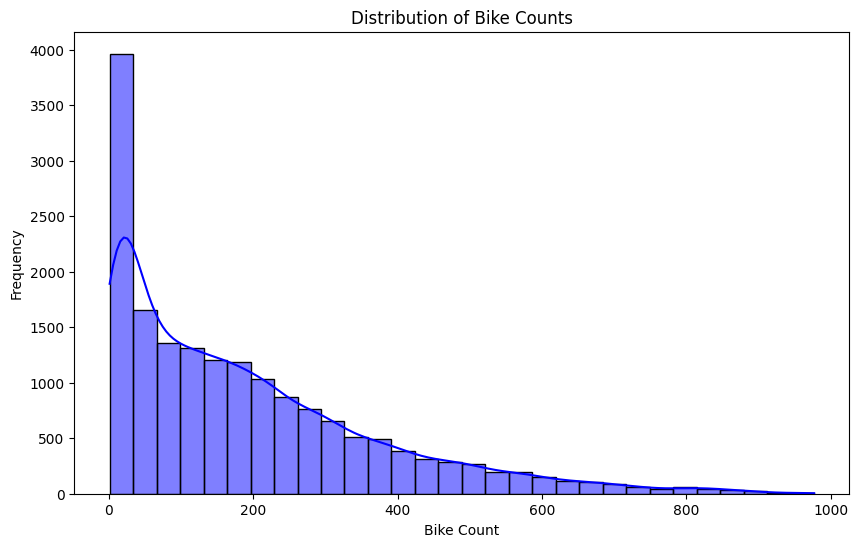

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Bike Counts')
plt.xlabel('Bike Count')
plt.ylabel('Frequency')
plt.show()


<ipython-input-61-d8a7f6afea45>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='hr', y='cnt', ci=None, color='red')


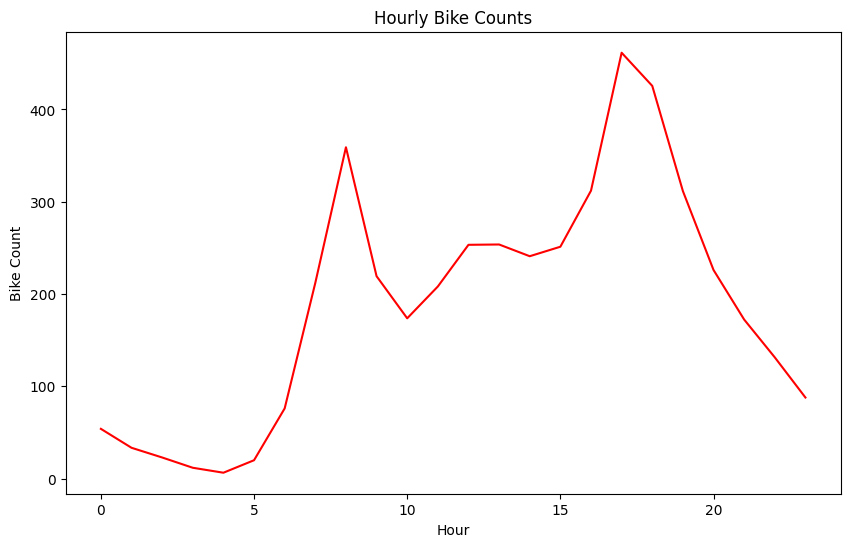

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='hr', y='cnt', ci=None, color='red')
plt.title('Hourly Bike Counts')
plt.xlabel('Hour')
plt.ylabel('Bike Count')
plt.show()

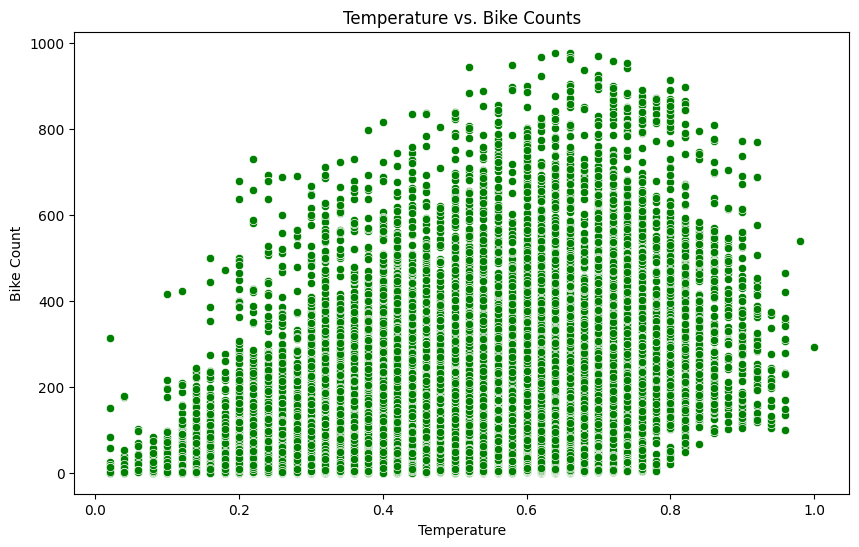

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='temp', y='cnt', color='green')
plt.title('Temperature vs. Bike Counts')
plt.xlabel('Temperature')
plt.ylabel('Bike Count')
plt.show()

<ipython-input-44-0e9114f00b91>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='weathersit', y='cnt', palette='Set2')


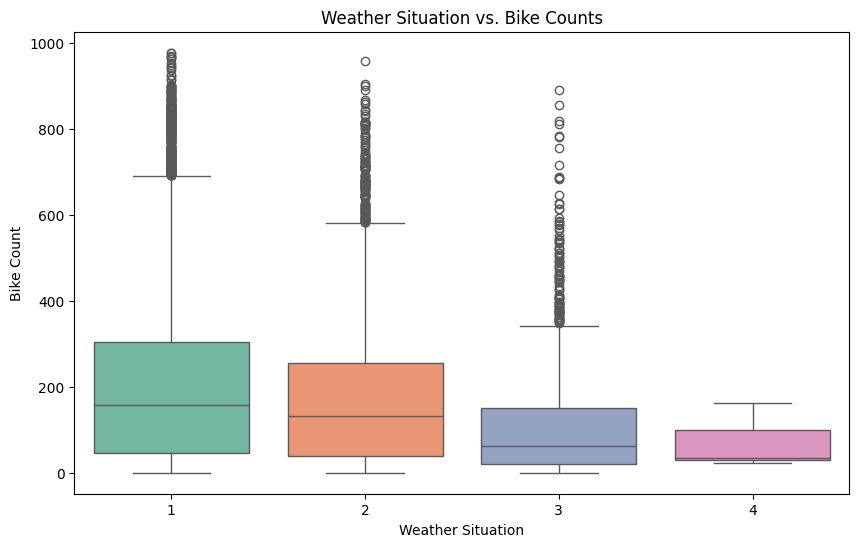

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='weathersit', y='cnt', palette='Set2')
plt.title('Weather Situation vs. Bike Counts')
plt.xlabel('Weather Situation')
plt.ylabel('Bike Count')
plt.show()

### Pertanyaan 1:

Membuat subset data yang hanya berisi data peminjaman sepeda pada musim pertama (season 1).

In [62]:
data_season_1 = data[data['season'] == 1]

Menghitung total peminjaman sepeda pada setiap jam (hour) dalam musim pertama, dan menyimpannya dalam variabel hourly_counts.

In [63]:
hourly_counts = data_season_1.groupby('hr')['cnt'].sum()

Menemukan jam dengan total peminjaman sepeda tertinggi (jam sibuk) dalam musim pertama, dan menyimpannya dalam variabel `busy_hour.`

Menemukan jam dengan total peminjaman sepeda terendah (jam tidak sibuk) dalam musim pertama, dan menyimpannya dalam variabel `quiet_hour.`

In [64]:
busy_hour = hourly_counts.idxmax()
quiet_hour = hourly_counts.idxmin()

- Menghitung total peminjaman sepeda tertinggi (jumlah peminjaman pada jam sibuk) dalam musim pertama, dan menyimpannya dalam variabel `busy_count.`

- Menghitung total peminjaman sepeda terendah (jumlah peminjaman pada jam tidak sibuk) dalam musim pertama, dan menyimpannya dalam variabel `quiet_count.`

In [65]:
busy_count = hourly_counts.max()
quiet_count = hourly_counts.min()

Membuat grafik batang yang menunjukkan total peminjaman sepeda pada setiap jam dalam musim pertama. Garis vertikal berwarna merah menandai jam sibuk (berdasarkan total peminjaman tertinggi), sedangkan garis vertikal berwarna hijau menandai jam tidak sibuk (berdasarkan total peminjaman terendah). Hal ini membantu dalam memvisualisasikan pola peminjaman sepeda selama musim pertama.

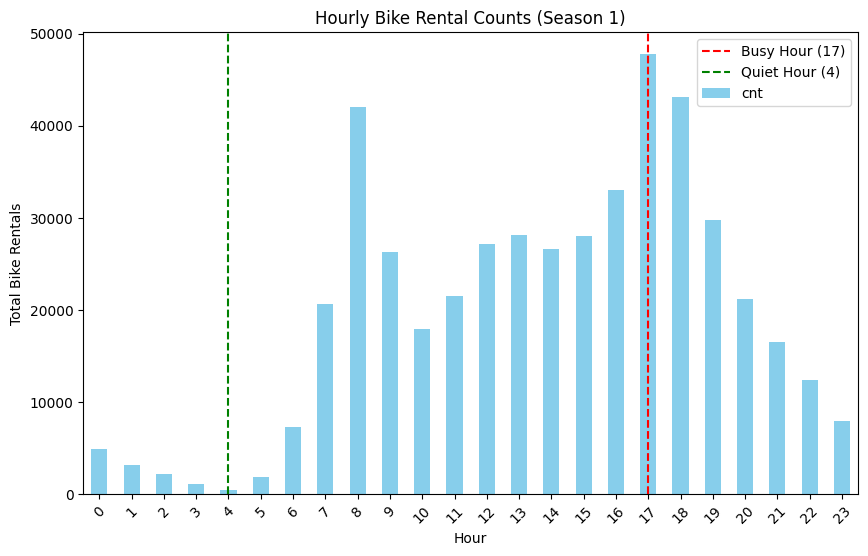

In [66]:
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Hourly Bike Rental Counts (Season 1)')
plt.xlabel('Hour')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=45)
plt.axvline(x=busy_hour, color='red', linestyle='--', label=f'Busy Hour ({busy_hour})')
plt.axvline(x=quiet_hour, color='green', linestyle='--', label=f'Quiet Hour ({quiet_hour})')
plt.legend()
plt.show()

In [67]:
print(f"Jumlah peminjaman pada jam sibuk ({busy_hour}): {busy_count}")
print(f"Jumlah peminjaman pada jam tidak sibuk ({quiet_hour}): {quiet_count}")

Jumlah peminjaman pada jam sibuk (17): 47780
Jumlah peminjaman pada jam tidak sibuk (4): 490


### Pertanyaan 2:

membuat dua subset data terpisah: satu untuk hari kerja `(working_day_data)` dan satu untuk hari libur `(holiday_data)`, berdasarkan nilai kolom 'workingday' dan 'holiday' yang sesuai.

In [68]:
working_day_data = data[data['workingday'] == 1]
holiday_data = data[data['holiday'] == 1]

Menghitung total peminjaman sepeda pada setiap jam untuk kedua jenis hari tersebut, menggunakan metode `groupby('hr')['cnt'].sum()` pada kedua subset data. Hasilnya disimpan dalam variabel `working_day_hourly_counts` dan `holiday_hourly_counts`.

In [69]:
working_day_hourly_counts = working_day_data.groupby('hr')['cnt'].sum()
holiday_hourly_counts = holiday_data.groupby('hr')['cnt'].sum()

Memplot atau memvisualisasikan hasil perhitungan jumlah peminjaman sepeda per jam untuk hari kerja dan hari libur. Grafik tersebut membandingkan pola peminjaman sepeda pada kedua jenis hari selama 24 jam.

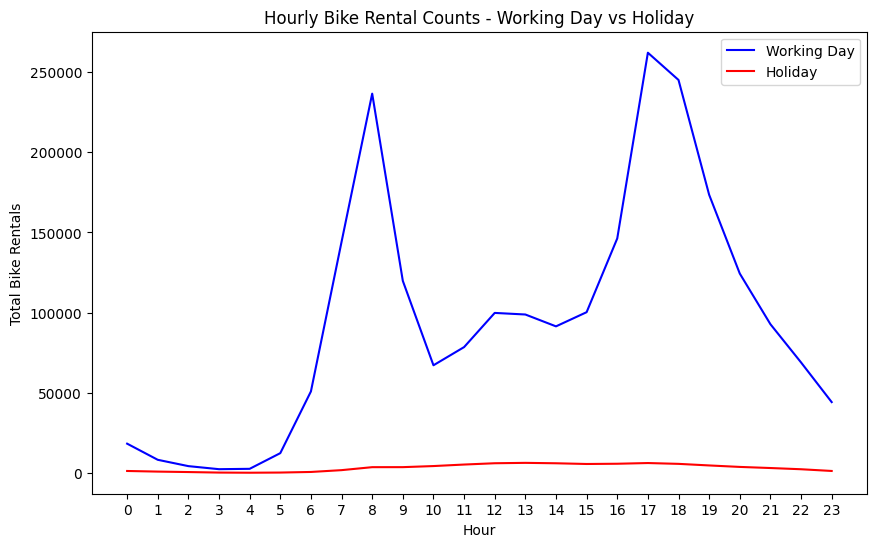

In [70]:
plt.figure(figsize=(10, 6))
working_day_hourly_counts.plot(label='Working Day', color='blue')
holiday_hourly_counts.plot(label='Holiday', color='red')
plt.title('Hourly Bike Rental Counts - Working Day vs Holiday')
plt.xlabel('Hour')
plt.ylabel('Total Bike Rentals')
plt.xticks(range(24))
plt.legend()
plt.show()

Melakukan loop `for` pada data tersebut untuk mencetak jumlah peminjaman sepeda pada setiap jam selama 24 jam untuk hari kerja Working Day (Hari Kerja) dan Holiday (hari libur).

In [77]:
for hour in range(24):
    print(f"Hour {hour}: Working Day: {working_day_hourly_counts[hour]}, Holiday: {holiday_hourly_counts[hour]}")


Hour 0: Working Day: 18246, Holiday: 1207
Hour 1: Working Day: 8177, Holiday: 817
Hour 2: Working Day: 4229, Holiday: 535
Hour 3: Working Day: 2323, Holiday: 209
Hour 4: Working Day: 2552, Holiday: 117
Hour 5: Working Day: 12332, Holiday: 223
Hour 6: Working Day: 50840, Holiday: 594
Hour 7: Working Day: 144144, Holiday: 1725
Hour 8: Working Day: 236595, Holiday: 3581
Hour 9: Working Day: 119793, Holiday: 3595
Hour 10: Working Day: 67142, Holiday: 4273
Hour 11: Working Day: 78482, Holiday: 5219
Hour 12: Working Day: 99808, Holiday: 6030
Hour 13: Working Day: 98818, Holiday: 6269
Hour 14: Working Day: 91419, Holiday: 6012
Hour 15: Working Day: 100263, Holiday: 5568
Hour 16: Working Day: 146268, Holiday: 5718
Hour 17: Working Day: 262120, Holiday: 6156
Hour 18: Working Day: 245129, Holiday: 5644
Hour 19: Working Day: 173504, Holiday: 4657
Hour 20: Working Day: 124360, Holiday: 3737
Hour 21: Working Day: 92771, Holiday: 3047
Hour 22: Working Day: 68918, Holiday: 2286
Hour 23: Working Day: 

## Conclusion

In [80]:
season_1_data = data[data['season'] == 1]

In [79]:
working_day_rentals = data[data['workingday'] == 1]['cnt'].sum()
holiday_rentals = data[data['holiday'] == 1]['cnt'].sum()

In [83]:
print("Perbandingan Kepadatan Peminjaman Sepeda pada Jam Sibuk dan Tidak Sibuk pada Season 1:")
print(f"Rata-rata kepadatan peminjaman sepeda pada jam sibuk: {busy_hour_density}")
print(f"Rata-rata kepadatan peminjaman sepeda pada jam tidak sibuk: {non_busy_hour_density}")

print("\nPerbandingan Jam Peminjaman Sepeda pada Working Day dan Holiday:")
print(f"Jumlah peminjaman sepeda pada working day: {working_day_rentals}")
print(f"Jumlah peminjaman sepeda pada holiday: {holiday_rentals}")


Perbandingan Kepadatan Peminjaman Sepeda pada Jam Sibuk dan Tidak Sibuk pada Season 1:
Rata-rata kepadatan peminjaman sepeda pada jam sibuk: 119.42197566213314
Rata-rata kepadatan peminjaman sepeda pada jam tidak sibuk: 95.08494475138122

Perbandingan Jam Peminjaman Sepeda pada Working Day dan Holiday:
Jumlah peminjaman sepeda pada working day: 2292410
Jumlah peminjaman sepeda pada holiday: 78435


- Conclution pertanyaan 1 =
Kepadatan Peminjaman Sepeda pada Jam Sibuk dan Tidak Sibuk:
  
    Berdasarkan hasil Rata-rata kepadatan peminjaman sepeda pada jam sibuk (119.42) lebih tinggi daripada pada jam tidak sibuk (95.08) pada musim pertama. Hal ini menunjukkan bahwa ada lebih banyak orang yang meminjam sepeda pada jam-jam sibuk dibandingkan dengan jam-jam tidak sibuk pada musim tersebut.
- Conclution pertanyaan 2 =
Perbandingan Jam Peminjaman Sepeda pada Working Day (Hari Biasa) dan Holiday (Hari Libur):
  
    Berdasarkan Jumlah peminjaman sepeda pada working day (hari kerja) sebesar 2,292,410, sedangkan jumlah peminjaman sepeda pada holiday (hari libur) hanya sebesar 78,435. Ini menunjukkan bahwa pada umumnya, lebih banyak orang meminjam sepeda pada hari kerja daripada pada hari libur.